# 0. 프로젝트 목적
- 스타벅스 브랜드와 이디야 브랜드 커피의 마케팅 전략 분석
- 과연 이디야 커피는 스타벅스 커피 근처에 점포를 여는 전략을 사용할까?에 대한 분석 시작

In [1]:
import urllib.request
import selenium
import time
from selenium import webdriver
from bs4 import BeautifulSoup
from selenium.webdriver.common.by import By

# 1. starbucks 데이터 추출

In [2]:
url = "https://www.starbucks.co.kr/store/store_map.do"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)

C:\Users\xswer\AppData\Local\Temp\ipykernel_16592\2407163575.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../driver/chromedriver.exe")


SessionNotCreatedException: Message: session not created: This version of ChromeDriver only supports Chrome version 109
Current browser version is 113.0.5672.126 with binary path C:\Program Files\Google\Chrome\Application\chrome.exe
Stacktrace:
Backtrace:
	(No symbol) [0x00F66643]
	(No symbol) [0x00EFBE21]
	(No symbol) [0x00DFDA9D]
	(No symbol) [0x00E22911]
	(No symbol) [0x00E1D630]
	(No symbol) [0x00E1A899]
	(No symbol) [0x00E56917]
	(No symbol) [0x00E5655C]
	(No symbol) [0x00E4FB76]
	(No symbol) [0x00E249C1]
	(No symbol) [0x00E25E5D]
	GetHandleVerifier [0x011DA142+2497106]
	GetHandleVerifier [0x012085D3+2686691]
	GetHandleVerifier [0x0120BB9C+2700460]
	GetHandleVerifier [0x01013B10+635936]
	(No symbol) [0x00F04A1F]
	(No symbol) [0x00F0A418]
	(No symbol) [0x00F0A505]
	(No symbol) [0x00F1508B]
	BaseThreadInitThunk [0x77307D59+25]
	RtlInitializeExceptionChain [0x77D5B74B+107]
	RtlClearBits [0x77D5B6CF+191]


In [4]:
driver.find_element(By.CSS_SELECTOR, "#container > div > form > fieldset > div > section > article.find_store_cont > article > header.loca_search > h3 > a").click()
driver.find_element(By.XPATH, '//*[@id="container"]/div/form/fieldset/div/section/article[1]/article/article[2]/div[1]/div[2]/ul/li[1]/a').click()

In [5]:
time.sleep(2)
driver.find_element(By.XPATH, '//*[@id="mCSB_2_container"]/ul/li[1]/a').click()
req = driver.page_source

In [21]:
req = driver.page_source
soup = BeautifulSoup(req, "html.parser")

In [22]:
starbucks_gu = []
starbucks_ad = []
starbucks_name = []

store_adress_raw = soup.find_all("p", class_="result_details")[3:]
store_name_raw = soup.find_all("strong", {"data-yn" : "N"})[3:]

for n in store_adress_raw:
    starbucks_ad.append(n.get_text())
    starbucks_gu.append(n.get_text().split(" ")[1])
    
for n2 in store_name_raw:
    starbucks_name.append(n2.get_text())

In [23]:
type(starbucks_name), type(starbucks_ad), type(starbucks_gu)

(list, list, list)

In [24]:
starbucks_name

['역삼아레나빌딩  ',
 '논현역사거리  ',
 '신사역성일빌딩  ',
 '국기원사거리  ',
 '대치재경빌딩R  ',
 '봉은사역  ',
 '압구정윤성빌딩  ',
 '코엑스별마당  ',
 '삼성역섬유센터R  ',
 '압구정R  ',
 '수서역R  ',
 '양재강남빌딩R  ',
 '선릉동신빌딩R  ',
 '봉은사로선정릉  ',
 '강남오거리  ',
 '스타필드코엑스몰R  ',
 '강남구청정문  ',
 '도곡공원  ',
 '강남R  ',
 '대치은마사거리  ',
 '청담영동대로  ',
 '압구정  ',
 '신사가로수  ',
 '청담스타R  ',
 '강남우성  ',
 '학동사거리  ',
 '대치사거리  ',
 '포스코사거리  ',
 '을지병원사거리  ',
 '신사역  ',
 '도곡역  ',
 '서울세관사거리  ',
 '청담사거리  ',
 '한티역  ',
 '역삼초교사거리  ',
 '코엑스몰  ',
 '가로수길  ',
 '역삼대로  ',
 '역삼포스코  ',
 '강남대로  ',
 '청담  ',
 '삼성도심공항  ',
 '삼성교  ',
 '학동역  ',
 '대치  ',
 'SSG마켓도곡R  ',
 '삼성  ',
 '선릉세화빌딩  ',
 '압구정역  ',
 '압구정로  ',
 '구역삼사거리  ',
 '큰길타워  ',
 '강남구청역  ',
 '대치역  ',
 '포이  ',
 '아크플레이스  ',
 '학여울역  ',
 '선정릉역  ',
 '삼성현대힐  ',
 'GS타워  ',
 '압구정미소  ',
 '선릉역  ',
 '코엑스사거리  ',
 '역삼럭키  ',
 '청담공원  ',
 '신압구정  ',
 '아크로힐스논현  ',
 '강남비젼타워  ',
 '압구정로데오역  ',
 '르네상스사거리  ',
 '포스코  ',
 '선릉로  ',
 '논현힐탑  ',
 '도산가로수길  ',
 '대치한티  ',
 '수서역사거리  ',
 '코엑스아셈타워  ',
 '센터필드R  ',
 '도산사거리  ',
 '강남세곡  ',
 '대치삼성프라자  ',
 '언주역  ',
 '강남역신분당역사  ',
 '

In [25]:
import pandas as pd

starbucks_data = pd.DataFrame({
    "매장이름" : starbucks_name,
    "주소" : starbucks_ad,
    "구이름" : starbucks_gu
    
})

In [26]:
starbucks_data

매장이름                                              주소  구이름
0    역삼아레나빌딩                  서울특별시 강남구 언주로 425 (역삼동)1522-3232  강남구
1     논현역사거리                 서울특별시 강남구 강남대로 538 (논현동)1522-3232  강남구
2    신사역성일빌딩                 서울특별시 강남구 강남대로 584 (논현동)1522-3232  강남구
3     국기원사거리                 서울특별시 강남구 테헤란로 125 (역삼동)1522-3232  강남구
4    대치재경빌딩R               서울특별시 강남구 남부순환로 2947 (대치동)1522-3232  강남구
..         ...                                             ...  ...
594     사가정역                        서울특별시 중랑구 면목로 3101522-3232  중랑구
595      상봉역                  서울특별시 중랑구 망우로 307 (상봉동)1522-3232  중랑구
596       묵동    서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층1522-3232  중랑구
597      양원역                서울특별시 중랑구 양원역로10길 3 (망우동)1522-3232  중랑구
598      중화역                       서울특별시 중랑구 봉화산로 35 1522-3232  중랑구

[599 rows x 3 columns]

In [102]:
driver.quit()

In [28]:
gu_list = starbucks_data["구이름"].unique()

---
- 강서구, 중구에서 너무 많은 검색 결과로 오류가 발생해서 '행정동'으로 검색하려고 했으나, "서울" + 구를 넣으면서 문제 해결!


In [13]:
dong_list_raw = pd.read_excel("./Seoul_dong.xlsx")
dong_list = pd.DataFrame(dong_list_raw)
dong_list = dong_list["읍면동명"].dropna(axis=0)

In [14]:
dong_list = dong_list.unique()

In [15]:
dong_list = list(dong_list)
dong_list

['청운효자동',
 '사직동',
 '삼청동',
 '부암동',
 '평창동',
 '무악동',
 '교남동',
 '가회동',
 '종로1.2.3.4가동',
 '종로5.6가동',
 '이화동',
 '혜화동',
 '창신제1동',
 '창신제2동',
 '창신제3동',
 '숭인제1동',
 '숭인제2동',
 '소공동',
 '회현동',
 '명동',
 '필동',
 '장충동',
 '광희동',
 '을지로동',
 '신당동',
 '다산동',
 '약수동',
 '청구동',
 '신당제5동',
 '동화동',
 '황학동',
 '중림동',
 '후암동',
 '용산2가동',
 '남영동',
 '청파동',
 '원효로제1동',
 '원효로제2동',
 '효창동',
 '용문동',
 '한강로동',
 '이촌제1동',
 '이촌제2동',
 '이태원제1동',
 '이태원제2동',
 '한남동',
 '서빙고동',
 '보광동',
 '왕십리제2동',
 '왕십리도선동',
 '마장동',
 '사근동',
 '행당제1동',
 '행당제2동',
 '응봉동',
 '금호1가동',
 '금호2.3가동',
 '금호4가동',
 '옥수동',
 '성수1가제1동',
 '성수1가제2동',
 '성수2가제1동',
 '성수2가제3동',
 '송정동',
 '용답동',
 '화양동',
 '군자동',
 '중곡제1동',
 '중곡제2동',
 '중곡제3동',
 '중곡제4동',
 '능동',
 '광장동',
 '자양제1동',
 '자양제2동',
 '자양제3동',
 '자양제4동',
 '구의제1동',
 '구의제2동',
 '구의제3동',
 '용신동',
 '제기동',
 '전농제1동',
 '전농제2동',
 '답십리제1동',
 '답십리제2동',
 '장안제1동',
 '장안제2동',
 '청량리동',
 '회기동',
 '휘경제1동',
 '휘경제2동',
 '이문제1동',
 '이문제2동',
 '면목제2동',
 '면목제4동',
 '면목제5동',
 '면목본동',
 '면목제7동',
 '면목제3.8동',
 '상봉제1동',
 '상봉제2동',
 '중화제1동',
 '중화제2동',
 '묵제1동',
 '묵제2동',
 '망우본동

---

In [35]:
import time
from tqdm import tqdm_notebook

In [75]:


url = "https://www.ediya.com/contents/find_store.html#c"
driver = webdriver.Chrome("../driver/chromedriver.exe")
driver.get(url)

C:\Users\xswer\AppData\Local\Temp\ipykernel_19488\2802480551.py:2: DeprecationWarning: executable_path has been deprecated, please pass in a Service object
  driver = webdriver.Chrome("../driver/chromedriver.exe")


In [31]:
driver.find_element(By.XPATH, '//*[@id="contentWrap"]/div[3]/div/div[1]/ul/li[2]/a').click()

In [19]:
# driver.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 강남구")

In [20]:
# driver.find_element(By.XPATH, "/html/body/section/div[3]/div/div[1]/div/div[1]/div[2]/form/button").click()

In [32]:

time.sleep(2)

large_data = soup.select("#placesList > li")
print(large_data[1].select_one("dt").text)
print(large_data[1].select_one("dd").text)

print(large_data[1].select_one("dd").text.split(" ")[1])


IndexError: list index out of range

In [33]:
len(large_data)

0

In [29]:
gu_list

array(['강남구', '강북구', '강서구', '관악구', '광진구', '금천구', '노원구', '도봉구', '동작구',
       '마포구', '서대문구', '서초구', '성북구', '송파구', '양천구', '영등포구', '은평구', '종로구',
       '중구', '강동구', '구로구', '동대문구', '성동구', '용산구', '중랑구'], dtype=object)

In [36]:
ediya_name = []
ediya_ad = []
ediya_gu = []

for n in tqdm_notebook(gu_list):
    driver.find_element(By.XPATH, '//*[@id="keyword"]').clear()
    driver.find_element(By.XPATH, '//*[@id="keyword"]').send_keys("서울 " + n)
    driver.find_element(By.XPATH, "/html/body/section/div[3]/div/div[1]/div/div[1]/div[2]/form/button").click()
    time.sleep(1)
    soup = BeautifulSoup(driver.page_source, "html.parser")
    large_data = soup.select("#placesList > li")
    

    for num in range(len(large_data)):
        ediya_name.append(large_data[num].select_one("dt").text)
        ediya_ad.append(large_data[num].select_one("dd").text)
        ediya_gu.append(large_data[num].select_one("dd").text.split(" ")[1])
    time.sleep(1)

C:\Users\xswer\AppData\Local\Temp\ipykernel_19488\1246825642.py:5: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(gu_list):


  0%|          | 0/25 [00:00<?, ?it/s]

In [37]:
len(ediya_name),len(ediya_ad),len(ediya_gu)

(709, 709, 709)

In [38]:
print(ediya_gu)

['강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강남구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강북구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '강서구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '관악구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구', '광진구'

In [39]:
ediya_data = pd.DataFrame({
    "매장이름" : ediya_name,
    "주소" : ediya_ad,
    "구이름" : ediya_gu
})

In [40]:
ediya_data

매장이름                           주소  구이름
0        강남YMCA점                   서울 강남구 논현동  강남구
1    강남구청역아이티웨딩점  서울 강남구 학동로 338 (논현동, 강남파라곤)  강남구
2        강남논현학동점      서울 강남구 논현로131길 28 (논현동)  강남구
3          강남대치점   서울 강남구 역삼로 415 (대치동, 성진빌딩)  강남구
4          강남도산점      서울 강남구 도산대로37길 20 (신사동)  강남구
..           ...                          ...  ...
704       중랑교차로점         서울 중랑구 동일로 683 (면목동)  중랑구
705         중랑역점         서울 중랑구 망우로 198 (상봉동)  중랑구
706         중화동점       서울 중랑구 동일로129길 1 (중화동)  중랑구
707         중화역점           서울 중랑구 동일로 815, 1층  중랑구
708        화랑대역점  서울 중랑구 신내로25가길 2 (묵동, 현동학당)  중랑구

[709 rows x 3 columns]

In [42]:
import folium
import googlemaps

In [43]:
my_map = folium.Map(location=[37.5666805, 126.9784147], zoom_start=13.5)
my_map

In [44]:
gmaps_key = ""
gmaps =googlemaps.Client(key=gmaps_key)

In [45]:
ediya_data.head()

매장이름                           주소  구이름
0      강남YMCA점                   서울 강남구 논현동  강남구
1  강남구청역아이티웨딩점  서울 강남구 학동로 338 (논현동, 강남파라곤)  강남구
2      강남논현학동점      서울 강남구 논현로131길 28 (논현동)  강남구
3        강남대치점   서울 강남구 역삼로 415 (대치동, 성진빌딩)  강남구
4        강남도산점      서울 강남구 도산대로37길 20 (신사동)  강남구

In [46]:
starbucks_data.head()

매장이름                                   주소  구이름
0  역삼아레나빌딩       서울특별시 강남구 언주로 425 (역삼동)1522-3232  강남구
1   논현역사거리      서울특별시 강남구 강남대로 538 (논현동)1522-3232  강남구
2  신사역성일빌딩      서울특별시 강남구 강남대로 584 (논현동)1522-3232  강남구
3   국기원사거리      서울특별시 강남구 테헤란로 125 (역삼동)1522-3232  강남구
4  대치재경빌딩R    서울특별시 강남구 남부순환로 2947 (대치동)1522-3232  강남구

In [47]:
geo_data = gmaps.geocode(ediya_data["주소"][0])

In [48]:
geo_location = geo_data[0].get("geometry")
geo_location

{'bounds': {'northeast': {'lat': 37.5229708, 'lng': 127.0437799},
  'southwest': {'lat': 37.504538, 'lng': 127.0195397}},
 'location': {'lat': 37.5135304, 'lng': 127.0315341},
 'location_type': 'APPROXIMATE',
 'viewport': {'northeast': {'lat': 37.5229708, 'lng': 127.0437799},
  'southwest': {'lat': 37.504538, 'lng': 127.0195397}}}

In [49]:
geo_location["location"]["lat"], geo_location["location"]["lng"]

(37.5135304, 127.0315341)

In [50]:
import numpy as np

In [51]:

ediya_lat = []
ediya_lng = []

for n in tqdm_notebook(ediya_data["주소"]):
    try:
        geo_data = gmaps.geocode(n)[0].get("geometry")

        ediya_lat.append(geo_data["location"]["lat"])
        ediya_lng.append(geo_data["location"]["lng"])
    except:
        ediya_lat.append(np.NaN)
        ediya_lng.append(np.NaN)
        print("pass")


C:\Users\xswer\AppData\Local\Temp\ipykernel_19488\3456867164.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(ediya_data["주소"]):


  0%|          | 0/709 [00:00<?, ?it/s]

pass
pass
pass
pass
pass
pass
pass
pass
pass


In [66]:
ediya_data["lat"] = ediya_lat
ediya_data["lng"] = ediya_lng
ediya_data

매장이름                           주소  구이름  브랜드        lat         lng
0        강남YMCA점                   서울 강남구 논현동  강남구  이디야  37.513530  127.031534
1    강남구청역아이티웨딩점  서울 강남구 학동로 338 (논현동, 강남파라곤)  강남구  이디야  37.516466  127.040419
2        강남논현학동점      서울 강남구 논현로131길 28 (논현동)  강남구  이디야  37.514227  127.028666
3          강남대치점   서울 강남구 역삼로 415 (대치동, 성진빌딩)  강남구  이디야  37.501251  127.052382
4          강남도산점      서울 강남구 도산대로37길 20 (신사동)  강남구  이디야  37.522241  127.031481
..           ...                          ...  ...  ...        ...         ...
704       중랑교차로점         서울 중랑구 동일로 683 (면목동)  중랑구  이디야  37.591397  127.079841
705         중랑역점         서울 중랑구 망우로 198 (상봉동)  중랑구  이디야  37.593212  127.074866
706         중화동점       서울 중랑구 동일로129길 1 (중화동)  중랑구  이디야  37.599293  127.078348
707         중화역점           서울 중랑구 동일로 815, 1층  중랑구  이디야  37.603092  127.078876
708        화랑대역점  서울 중랑구 신내로25가길 2 (묵동, 현동학당)  중랑구  이디야  37.619451  127.084160

[709 rows x 6 columns]

In [ ]:
import numpy as np

In [52]:

starbucks_data

starbucks_lat = []
starbucks_lng = []

for n in tqdm_notebook(starbucks_data["주소"]):
    try:
        geo_data = gmaps.geocode(n)[0].get("geometry")
        
        starbucks_lat.append(geo_data["location"]["lat"])
        starbucks_lng.append(geo_data["location"]["lng"])
    except:
        starbucks_lat.append(np.NaN)
        starbucks_lng.append(np.NaN)
        print('pass')


C:\Users\xswer\AppData\Local\Temp\ipykernel_19488\1613293770.py:6: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for n in tqdm_notebook(starbucks_data["주소"]):


  0%|          | 0/599 [00:00<?, ?it/s]

pass
pass
pass


In [57]:
len(starbucks_lat)

599

In [58]:
starbucks_data["주소"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 599 entries, 0 to 598
Series name: 주소
Non-Null Count  Dtype 
--------------  ----- 
599 non-null    object
dtypes: object(1)
memory usage: 4.8+ KB


In [59]:
starbucks_data["lat"] = starbucks_lat
starbucks_data["lng"] = starbucks_lng
starbucks_data

매장이름                                              주소  구이름   브랜드  \
0    역삼아레나빌딩                  서울특별시 강남구 언주로 425 (역삼동)1522-3232  강남구  스타벅스   
1     논현역사거리                 서울특별시 강남구 강남대로 538 (논현동)1522-3232  강남구  스타벅스   
2    신사역성일빌딩                 서울특별시 강남구 강남대로 584 (논현동)1522-3232  강남구  스타벅스   
3     국기원사거리                 서울특별시 강남구 테헤란로 125 (역삼동)1522-3232  강남구  스타벅스   
4    대치재경빌딩R               서울특별시 강남구 남부순환로 2947 (대치동)1522-3232  강남구  스타벅스   
..         ...                                             ...  ...   ...   
594     사가정역                        서울특별시 중랑구 면목로 3101522-3232  중랑구  스타벅스   
595      상봉역                  서울특별시 중랑구 망우로 307 (상봉동)1522-3232  중랑구  스타벅스   
596       묵동    서울특별시 중랑구 동일로 952 (묵동, 로프트원 태릉입구역) 1층1522-3232  중랑구  스타벅스   
597      양원역                서울특별시 중랑구 양원역로10길 3 (망우동)1522-3232  중랑구  스타벅스   
598      중화역                       서울특별시 중랑구 봉화산로 35 1522-3232  중랑구  스타벅스   

           lat         lng  
0    37.499907  127.037393  
1    37.513530  127.031534  
2    37.513530  127.031534  
3    37.499549  127.031660  
4    37.494519  127.062633  
..         ...         ...  
594  37.584199  127.086615  
595  37.596897  127.086455  
596  37.615343  127.076646  
597  37.607439  127.109221  
598  37.601692  127.078257  

[599 rows x 6 columns]

In [ ]:
driver.quit()

In [60]:
import matplotlib.pyplot as plt
import folium
from matplotlib import rc

plt.rcParams['axes.unicode_minus'] = False
rc('font', family='Malgun Gothic')
%matplotlib inline

In [61]:
starbucks_data["브랜드"] = "스타벅스"
ediya_data["브랜드"] = "이디야"

In [67]:
df_result = pd.concat([starbucks_data, ediya_data])
df_result.reset_index(drop=True)

매장이름                                   주소  구이름   브랜드        lat  \
0     역삼아레나빌딩       서울특별시 강남구 언주로 425 (역삼동)1522-3232  강남구  스타벅스  37.499907   
1      논현역사거리      서울특별시 강남구 강남대로 538 (논현동)1522-3232  강남구  스타벅스  37.513530   
2     신사역성일빌딩      서울특별시 강남구 강남대로 584 (논현동)1522-3232  강남구  스타벅스  37.513530   
3      국기원사거리      서울특별시 강남구 테헤란로 125 (역삼동)1522-3232  강남구  스타벅스  37.499549   
4     대치재경빌딩R    서울특별시 강남구 남부순환로 2947 (대치동)1522-3232  강남구  스타벅스  37.494519   
...         ...                                  ...  ...   ...        ...   
1303     중랑교차로점                 서울 중랑구 동일로 683 (면목동)  중랑구   이디야  37.591397   
1304       중랑역점                 서울 중랑구 망우로 198 (상봉동)  중랑구   이디야  37.593212   
1305       중화동점               서울 중랑구 동일로129길 1 (중화동)  중랑구   이디야  37.599293   
1306       중화역점                   서울 중랑구 동일로 815, 1층  중랑구   이디야  37.603092   
1307      화랑대역점          서울 중랑구 신내로25가길 2 (묵동, 현동학당)  중랑구   이디야  37.619451   

             lng  
0     127.037393  
1     127.031534  
2     127.031534  
3     127.031660  
4     127.062633  
...          ...  
1303  127.079841  
1304  127.074866  
1305  127.078348  
1306  127.078876  
1307  127.084160  

[1308 rows x 6 columns]

In [68]:
df_result["브랜드"]

0      스타벅스
1      스타벅스
2      스타벅스
3      스타벅스
4      스타벅스
       ... 
704     이디야
705     이디야
706     이디야
707     이디야
708     이디야
Name: 브랜드, Length: 1308, dtype: object

In [69]:
df_result = df_result.dropna()

In [70]:


for idx, value in df_result.iterrows():
    if value["브랜드"] == "스타벅스":
        use_c = "red"
    else:
        use_c = "blue"

    folium.Marker(
        location=[value["lat"],value["lng"]],
        popup=value["주소"],
        tooltip = value["브랜드"],
        icon =folium.Icon(
                icon ="coffee",
                prefix="fa",
                color = use_c) ).add_to(my_map)

        
my_map

# 1. 시각 자료 확인 결과
- 스타벅스는 대체적으로 한 지역에 몰려있는 경우가 많으며,
- 이디야는 서울 곳곳에 넓게 퍼진 것을 확인 할 수 있음
- 해당 프로젝트 진행의 목적인 대립가설인 '이디야 카페는 스타벅스 근처에 마케팅을 한다'는 신빙성이 다소 부족해보임

- 또한, 2023.02.10 시점 기준 이디야 매장 709개, 스타벅스 599개
```
 1. 산지, 국립공원 등 매장 설치가 불가능한 지역을 제외
 2. 제외한 서울시 면적에서 유동인구 및 고객층이 넓은 지역
 3. 위 두 가지 조건에 충족하는 상권에 두 브랜드의 매장이 인접하게 위치하는 것은 불가피함
```

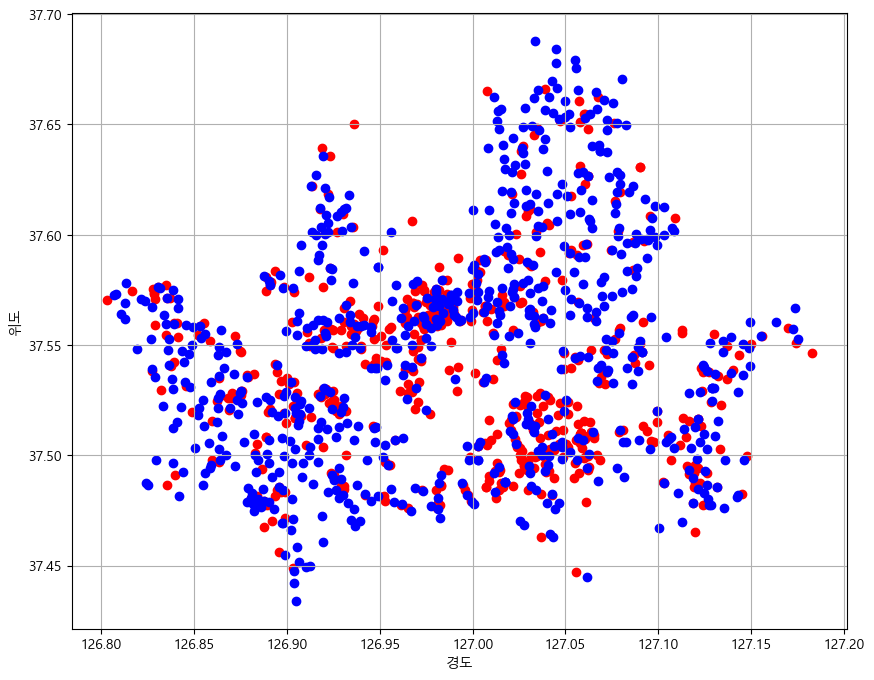

In [71]:
plt.figure(figsize=(10, 8))
plt.scatter(data=starbucks_data, x="lng", y="lat", color="red")
plt.scatter(data=ediya_data, x="lng", y="lat", color="blue")
plt.xlabel("경도")
plt.ylabel("위도")
plt.grid()
plt.show()

# 2. 산점도 그래프 결과 확인
- 다른 브랜드 카페의 위치를 확인하지 않아 신빙성이 다소 부족하나, 스타벅스(빨간점)가 위치한 장소에 이디야 매장이 없는 경우도 다소 존재
- 또한, 스타벅스가 위치하고 있는 자송에 이디야 매장이 밀집한 경우도 존재함


# 3. 결론
- 여러 상황(서울시의 제한된 상권, 스타벅스와 이디야가 인접하지 않은 지역)을 검토한 결과 이디야 브랜드와 스타벅스 브랜드는 인구밀도가 높으며, 유동인구는 활발한 지역에 매장을 설치하는 마케팅 전략을 사용하고, 마케팅 전략 결과 인접한 위치에 있는 것이지 이디야 브랜드가 마케팅 전략으로 스타벅스 근처에 위치했다고 보기 어렵다고 봄.